In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from datetime import datetime

from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split,
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.utils import shuffle 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


import warnings
warnings.filterwarnings("ignore")

# Clean Data

This notebook cleans the source data and saves a clean, labeld  CSV file for the analysis and modeling.

In [2]:
df = pd.read_csv('data/vehicles.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [4]:
df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


## Tighten up the data

There is quite a spread to the data and quite a few outliers, so let's tighten up the data set to focus on the kinds of cars a used car dealership might see (as opposed to an auction house).

Let eliminate outliers in the price column using z-score

In [5]:
z = np.abs(stats.zscore(df['price']))

threshold = 3
outliers = df[z > threshold]

print(outliers)

                id                   region       price    year  \
280     7315849335               birmingham   987654321  1960.0   
1838    7315961634                   dothan    99999999  1993.0   
29386   7305265540          humboldt county  1111111111  1999.0   
37409   7314053169                  modesto  1111111111  2020.0   
37410   7314052904                  modesto  3009548743  2021.0   
91576   7309730903                 delaware  3024942282  2000.0   
122470  7315836487                  atlanta   987654321  1960.0   
137807  7314339777  spokane / coeur d'alene   123456789  1999.0   
153082  7305153975             indianapolis  1234567890  2006.0   
184704  7304345156                frederick  1410065407  1989.0   
193736  7315524207                ann arbor   123456789  2015.0   
207080  7316831610                 muskegon   123456789  2003.0   
230753  7308010868                asheville   135008900  2008.0   
241404  7313748377    raleigh / durham / CH   113456789  1980.

In [6]:
# Drop the outliers
df = df.drop(outliers.index)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426860 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426860 non-null  int64  
 1   region        426860 non-null  object 
 2   price         426860 non-null  int64  
 3   year          425655 non-null  float64
 4   manufacturer  409216 non-null  object 
 5   model         421588 non-null  object 
 6   condition     252766 non-null  object 
 7   cylinders     249193 non-null  object 
 8   fuel          423847 non-null  object 
 9   odometer      422460 non-null  float64
 10  title_status  418618 non-null  object 
 11  transmission  424304 non-null  object 
 12  VIN           265837 non-null  object 
 13  drive         296302 non-null  object 
 14  size          120512 non-null  object 
 15  type          334014 non-null  object 
 16  paint_color   296669 non-null  object 
 17  state         426860 non-null  object 
dtypes: f

In [8]:
df['price'].max()

25003000

In [9]:
df['price'].min()

0

That helped but the range does not seem reasonable for a used case dealership so let's tighten up the data some more--say between $1,000 and $200,000

In [10]:
df = df[(df.price <200000) & (df.price >= 1000)]

array([[<Axes: title={'center': 'price'}>]], dtype=object)

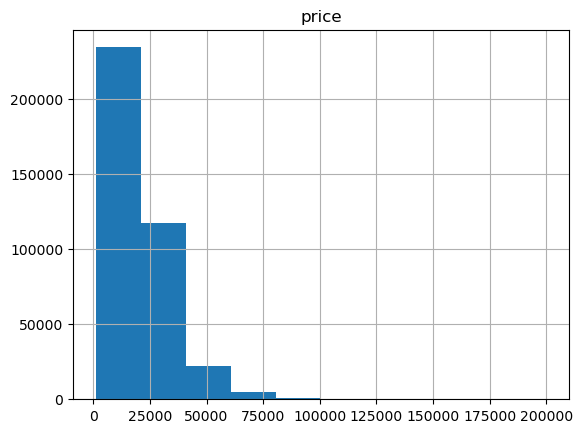

In [11]:
df.hist('price')

array([[<Axes: title={'center': 'year'}>]], dtype=object)

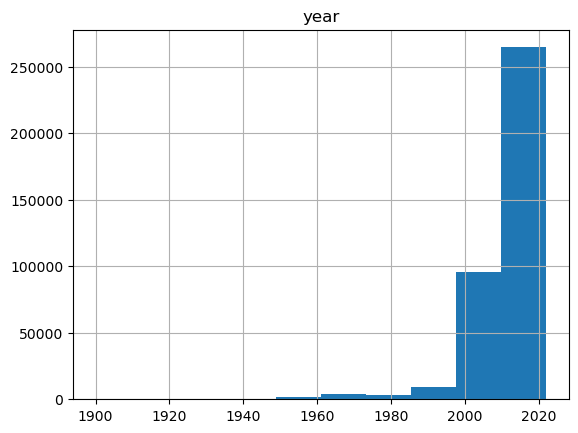

In [12]:
df.hist('year', bins=10)

Next, let's drop cards older than 1980

In [13]:
df = df[(df.year >= 1980)]

Next, let's drop odomeer readings over 250,000

In [14]:
df = df[(df.odometer <= 250000)]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363282 entries, 27 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            363282 non-null  int64  
 1   region        363282 non-null  object 
 2   price         363282 non-null  int64  
 3   year          363282 non-null  float64
 4   manufacturer  351922 non-null  object 
 5   model         359794 non-null  object 
 6   condition     225972 non-null  object 
 7   cylinders     213938 non-null  object 
 8   fuel          361178 non-null  object 
 9   odometer      363282 non-null  float64
 10  title_status  357267 non-null  object 
 11  transmission  361793 non-null  object 
 12  VIN           229471 non-null  object 
 13  drive         253940 non-null  object 
 14  size          101086 non-null  object 
 15  type          288233 non-null  object 
 16  paint_color   260487 non-null  object 
 17  state         363282 non-null  object 
dtypes: 

Let's drop VIN and ID, not useful for this purpose

In [16]:
df.drop(['VIN', 'id'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363282 entries, 27 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        363282 non-null  object 
 1   price         363282 non-null  int64  
 2   year          363282 non-null  float64
 3   manufacturer  351922 non-null  object 
 4   model         359794 non-null  object 
 5   condition     225972 non-null  object 
 6   cylinders     213938 non-null  object 
 7   fuel          361178 non-null  object 
 8   odometer      363282 non-null  float64
 9   title_status  357267 non-null  object 
 10  transmission  361793 non-null  object 
 11  drive         253940 non-null  object 
 12  size          101086 non-null  object 
 13  type          288233 non-null  object 
 14  paint_color   260487 non-null  object 
 15  state         363282 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 47.1+ MB


In [18]:
pd.unique(df['region'])

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [19]:
pd.unique(df['manufacturer'])

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', nan, 'acura', 'hyundai', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'ferrari',
       'mini', 'pontiac', 'fiat', 'tesla', 'mercury', 'saturn',
       'harley-davidson', 'datsun', 'aston-martin', 'land rover',
       'morgan'], dtype=object)

The features'region', 'manufacturer'and 'state' seem to have too many unique values to be useful, so lets drop them for now

In [20]:
df.drop(['manufacturer', 'region', 'state'], axis=1, inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363282 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         363282 non-null  int64  
 1   year          363282 non-null  float64
 2   model         359794 non-null  object 
 3   condition     225972 non-null  object 
 4   cylinders     213938 non-null  object 
 5   fuel          361178 non-null  object 
 6   odometer      363282 non-null  float64
 7   title_status  357267 non-null  object 
 8   transmission  361793 non-null  object 
 9   drive         253940 non-null  object 
 10  size          101086 non-null  object 
 11  type          288233 non-null  object 
 12  paint_color   260487 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 38.8+ MB


In [22]:
df.model.nunique()

24470

Too many unique values in 'model' so will depend on manufacturer for now--could maybe go back and and use regex to parse base model to reduce count, but not sure it will be worth it.

In [23]:
df.drop('model', axis=1, inplace=True)

Finally, let's convert 'year' and 'odomeer' to type int

In [24]:
df = df.astype({"year":'int', "odometer":'int'}) 

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363282 entries, 27 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         363282 non-null  int64 
 1   year          363282 non-null  int64 
 2   condition     225972 non-null  object
 3   cylinders     213938 non-null  object
 4   fuel          361178 non-null  object
 5   odometer      363282 non-null  int64 
 6   title_status  357267 non-null  object
 7   transmission  361793 non-null  object
 8   drive         253940 non-null  object
 9   size          101086 non-null  object
 10  type          288233 non-null  object
 11  paint_color   260487 non-null  object
dtypes: int64(3), object(9)
memory usage: 36.0+ MB


## Missing Values

In [26]:
na_data = df.isna().sum()
na_data

price                0
year                 0
condition       137310
cylinders       149344
fuel              2104
odometer             0
title_status      6015
transmission      1489
drive           109342
size            262196
type             75049
paint_color     102795
dtype: int64

Quite a few NaNs -- the problematic ones are 'condition', 'cylinders', 'drive', 'size' and 'paint_color' as the represent 1/3 to 2/3 of the remaining dataset.  Let's see if we can do some intelligent substitution on the major features and use the *ffill* for the others.

In [27]:
df.condition.value_counts()

good         113529
excellent     87500
like new      18887
fair           4751
new             939
salvage         366
Name: condition, dtype: int64

In [28]:
df.cylinders.value_counts(normalize=True)

6 cylinders     0.387107
4 cylinders     0.316307
8 cylinders     0.276561
5 cylinders     0.007353
10 cylinders    0.005048
other           0.004202
3 cylinders     0.002641
12 cylinders    0.000781
Name: cylinders, dtype: float64

Let's base 'condition' on the vehicle's age and add a feature called *age*

In [29]:
df['age'] = datetime.now().year - df['year']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363282 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         363282 non-null  int64 
 1   year          363282 non-null  int64 
 2   condition     225972 non-null  object
 3   cylinders     213938 non-null  object
 4   fuel          361178 non-null  object
 5   odometer      363282 non-null  int64 
 6   title_status  357267 non-null  object
 7   transmission  361793 non-null  object
 8   drive         253940 non-null  object
 9   size          101086 non-null  object
 10  type          288233 non-null  object
 11  paint_color   260487 non-null  object
 12  age           363282 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 38.8+ MB


age <= 1 --> new \
age >1 & <= 2 --> like new \
age > 2 & <= 4 --> excellent \
age > 4 & <= 8 --> good \
age > 8 & <= 20 --> fair \
age > 20 --> salvage

In [31]:
missing_condition = df['condition'].isna()

condition_criteria = [df.loc[missing_condition, 'condition'] & df.loc[missing_condition, 'age'] <= 1,
df.loc[missing_condition, 'condition'] & ((df.loc[missing_condition, 'age'] > 1) & (df.loc[missing_condition, 'age'] <= 2)),
df.loc[missing_condition, 'condition'] & ((df.loc[missing_condition, 'age'] > 2) & (df.loc[missing_condition, 'age'] <= 4)),
df.loc[missing_condition, 'condition'] & ((df.loc[missing_condition, 'age'] > 4) & (df.loc[missing_condition, 'age'] <= 8)),
df.loc[missing_condition, 'condition'] & ((df.loc[missing_condition, 'age'] > 8) & (df.loc[missing_condition, 'age'] <= 20)),
df.loc[missing_condition, 'condition'] & df.loc[missing_condition, 'age'] > 20]

condition_list =['new', 'like new', 'excellent', 'good', 'fair', 'salvage']
df.loc[missing_condition, 'condition'] = np.select(condition_criteria, condition_list)


In [32]:
na_data = df.isna().sum()
na_data

price                0
year                 0
condition            0
cylinders       149344
fuel              2104
odometer             0
title_status      6015
transmission      1489
drive           109342
size            262196
type             75049
paint_color     102795
age                  0
dtype: int64

Fill NaNs with a defualt vlaue if there is an obvious choice, or use ffill is there is a more even distribution

In [33]:
df.cylinders.value_counts(normalize=True)

6 cylinders     0.387107
4 cylinders     0.316307
8 cylinders     0.276561
5 cylinders     0.007353
10 cylinders    0.005048
other           0.004202
3 cylinders     0.002641
12 cylinders    0.000781
Name: cylinders, dtype: float64

In [34]:
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [35]:
df.fuel.value_counts(normalize=True)

gas         0.843473
other       0.074744
diesel      0.064525
hybrid      0.012930
electric    0.004328
Name: fuel, dtype: float64

In [36]:
df['fuel'] = df['fuel'].fillna('gas')

In [37]:
df.title_status.value_counts(normalize=True)

clean         0.966372
rebuilt       0.019131
salvage       0.009760
lien          0.003812
missing       0.000705
parts only    0.000218
Name: title_status, dtype: float64

In [38]:
df['title_status'] = df['title_status'].fillna('clean')

In [39]:
df.transmission.value_counts(normalize=True)

automatic    0.782212
other        0.166617
manual       0.051170
Name: transmission, dtype: float64

In [40]:
df['transmission'] = df['transmission'].fillna('automatic')

In [41]:
df.drive.value_counts(normalize=True)

4wd    0.442762
fwd    0.366386
rwd    0.190852
Name: drive, dtype: float64

In [42]:
df['drive'] = df['drive'].fillna(method='ffill')

In [43]:
pd.unique(df['size'])

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [44]:
df['size'] = df['size'].fillna(method='ffill')

In [45]:
df.type.value_counts(normalize=True)

sedan          0.262257
SUV            0.230109
pickup         0.135609
truck          0.096363
other          0.066477
coupe          0.055920
hatchback      0.053432
wagon          0.033150
van            0.026052
convertible    0.022371
mini-van       0.015099
offroad        0.001693
bus            0.001468
Name: type, dtype: float64

In [46]:
df['type'] = df['type'].fillna(method='ffill')

In [47]:
df.paint_color.value_counts(normalize=True)

white     0.264393
black     0.215147
silver    0.147420
blue      0.105583
red       0.102811
grey      0.082783
green     0.023168
brown     0.022039
custom    0.021970
yellow    0.006411
orange    0.006119
purple    0.002154
Name: paint_color, dtype: float64

In [48]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')

In [49]:
na_data = df.isna().sum()
na_data

price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           4
size            4
type            0
paint_color     0
age             0
dtype: int64

Let's clean up those odd rows that should have been caught earlier and give us a clean new data set to work with

In [50]:
clean_df = df.dropna()

In [51]:
na_data = clean_df.isna().sum()
na_data

price           0
year            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
age             0
dtype: int64

Ta-Da!

In [52]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363278 entries, 31 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         363278 non-null  int64 
 1   year          363278 non-null  int64 
 2   condition     363278 non-null  object
 3   cylinders     363278 non-null  object
 4   fuel          363278 non-null  object
 5   odometer      363278 non-null  int64 
 6   title_status  363278 non-null  object
 7   transmission  363278 non-null  object
 8   drive         363278 non-null  object
 9   size          363278 non-null  object
 10  type          363278 non-null  object
 11  paint_color   363278 non-null  object
 12  age           363278 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 38.8+ MB


In [53]:
clean_df.to_csv('data/clean_vehicles.csv')